# PRACTICUM 4: LOGISTIC REGRESSION # 

### Abstract ###
In this practicum, we will design the logistic regression algorithm
to classify the bank notes as genuine or fake using the dataset provided by the UCI Machine
Learning repository. 
To get familiarized implementing a machine learning algorithm, which is Logistic Regression
from the scratch (i.e., without using any machine learning API).
To implement Stochastic Gradient Descent algorithm to learn the parameters of logistic
regression function from the training data.
To apply logistic regression algorithm to classify whether the bank notes is genuine or fake.
To get familiarized on tuning the performance of stochastic gradient descent algorithm on the Boston housing price dataset from UCI Machine Learning Repository.

In our results/findings, we have obtained accuracies [95.99271 96.35701 97.81421 95.99271 97.99636] from the 5 set of Train-Test-Split method with 60-40% split. We have also computed an optimal learning rate of 0.10 from our computed learned theta [[4.40351322][-7.15911589][-2.66363364][-1.3358347][1.39339848]].

---
## SECTION 1: Logistic Regression Equation ##

Logistic Regression is the entry-level supervised machine learning algorithm used for classification purposes. Logistic Regression is somehow similar to linear regression but it has different cost function and prediction function(hypothesis) as show below.

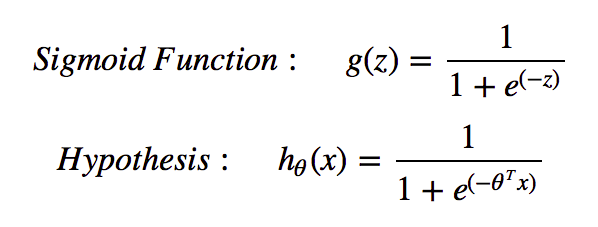

#### Sigmoid function ####

It is the activation function that squeezes the output of the function in the range between 0 and 1 where values less than 0.5 represent class 0 and values greater than or equal to 0.5 represents class 1.

We need theta, θ and features x as parameters in the equation above.

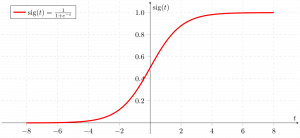

---
## SECTION 2: Error Function ##

#### Error/Cost Function ####

Cost function finds the error between the actual value and predicted value of our algorithm. With the help logarithm, we have smoothened the curve.

From the function, m=number of rows in the dataset, xᶦ=feature values of iᵗʰ, yᶦ=actual outcome of iᵗʰ. 

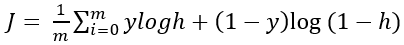

There are only two cases y = 0 or 1. In the cost function equation above, we have two terms:

1. y*logh
2. (1-y)*log(1-h).

If y = 0, the first term becomes zero, and the second term becomes log(1-h). In the equation, we already put a negative sign in the beginning.

If y = 1, the second term becomes zero and only ylogh term remains, with the negative sign in the beginning.

#### errCompute function code #### 

In [20]:
# E
def errCompute(X_norm, theta):
    
    # variable initialization
    x = X_norm[:,:-1]
    y = X_norm[:,-1]
    M = X_norm.shape[0]
    y_hat = expit(np.dot(x, theta))
    
    result = (np.dot(y,np.log(y_hat)) + np.dot((1 - y),np.log(1 - y_hat))) / (-M)  # error function
    return result
errCompute(X_norm, np.zeros((X_norm.shape[1]-1,1)))

array([0.69314718])

After running the errCompute function above, we got an error J of 0.6931

---
## SECTION 3: SGD Algorithm ##

Gradient Descent

We need to update our randomly initialized theta values. Gradient descent equation does just that if we take a partial differential of the cost function with respect to theta:

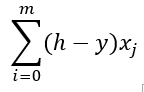

Using this expression above the gradient descent formula becomes:

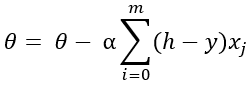

Here, alpha is the learning rate. Using this equation, theta values will be updated in each iteration. We will use all the equations above to develop the algorithm

---
## SECTION 4: Learning Rate ##

Computation of the cost=0.3151 and y-predicted values used the learned theta values using the shuffled.data

errCompute() =  [0.31513244]
accuracy =  90.59766763848397 %


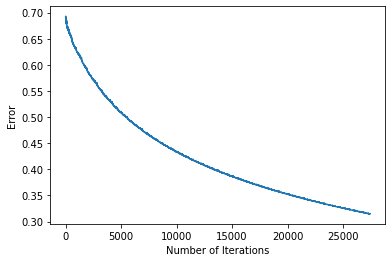

The learned theta is:
 [[ 4.40351322]
 [-7.15911589]
 [-2.66363364]
 [-1.3358347 ]
 [ 1.39339848]]


In [21]:
## F ----------------- calling main block -------------------
shuffled_raw = loadData('shuffled.data')
# print(shuffled_raw, shuffled_raw.shape)
X_shufnorm = dataNorm(shuffled_raw)
# print(X_shufnorm, X_shufnorm.shape)
theta = stochasticGD(X_shufnorm, np.zeros((X_shufnorm.shape[1]-1,1)), 0.01, 1372*20)
print('The learned theta is:\n', theta)

In [23]:
# F 
def pred_y_hat(X_norm, theta):
    # variable initialization
    x = X_norm[:,:-1]
    print("x",x.shape)
    
    # accuracy verification
    yPredict = loadData('predict.data')
    y_hat = np.around(expit(np.dot(x,theta)))
    accuracy = (yPredict == y_hat).mean() * 100
    print("accuracy = ", accuracy, "%")    
## ------------------ calling main block ------------------   
accuracy = pred_y_hat( X_shufnorm, theta)

x (1372, 5)
accuracy =  100.0 %


Using the learned theta, we can achieve a 100% accuracy of each sample in the file predict.data

In [24]:
# F
def optimal_alpha(X_norm, theta, alpha, num_iters, cost=0.05):
    # variable initialization
    x = X_norm[:,:-1]
    y = np.reshape(X_norm[:,-1],(x.shape[0],1))
    # creating an array to record the error after each iteration
    err_records = np.zeros((num_iters,1))
    alpha_records = np.zeros((num_iters, 1))
    # stochasticGD algorithm
    for idx in range(num_iters):
        #print "theta",theta.shape
        i = idx % x.shape[0]
        y_hat = expit(np.dot(x,theta))
        for j in range(x.shape[1]):
            prev = theta
            theta[j] += alpha * (y[i] - y_hat[i]) * x[i][j]
            new = theta                    
        err_records[idx] = errCompute(X_norm, theta)
        alpha_records[idx] = alpha      
        if err_records[0] < cost:   
            break
    return err_records[0][0], alpha_records[idx][0]

optimal_theta = np.array([4.40351322, -7.15911589, -2.66363364, -1.3358347, 1.39339848])        
## ---------------------------- calling main block -------------------------------
# given cost = 0.05, iteration = 1372*20, compute the optimal learn rate
for i in np.arange(0.01, 1.0, 0.01): # loop over the learning rate from 0.1 to 1.0
    cost = 0.05                      # abitrary cutoff cost function value 
    err, optimal = optimal_alpha(X_shufnorm, optimal_theta, i, 1372*20, cost)
    print('At learn rate =', round(i, 2))
    print(f'Cost: {round(err, 3)}, Learn rate: {round(optimal, 5)}')
    print()
    if err < cost:
        print(f'At cutoff_cost of {cost}, the optimal learn rate is {round(optimal, 3)}')
        break

At learn rate = 0.01
Cost: 0.315, Learn rate: 0.01

At learn rate = 0.02
Cost: 0.234, Learn rate: 0.02

At learn rate = 0.03
Cost: 0.162, Learn rate: 0.03

At learn rate = 0.04
Cost: 0.118, Learn rate: 0.04

At learn rate = 0.05
Cost: 0.092, Learn rate: 0.05

At learn rate = 0.06
Cost: 0.076, Learn rate: 0.06

At learn rate = 0.07
Cost: 0.066, Learn rate: 0.07

At learn rate = 0.08
Cost: 0.058, Learn rate: 0.08

At learn rate = 0.09
Cost: 0.053, Learn rate: 0.09

At learn rate = 0.1
Cost: 0.049, Learn rate: 0.1

At cutoff_cost of 0.05, the optimal learn rate is 0.1


In the cell code above, we use our learned theta values, cutoff cost function value of 0.05 and an n_interation of 1372x20 and given the 2 parameters, 
we managed to achieve an optimal learning rate of 0.10. If we want a more stringent error cost, we could have set the cut-off cost function value lower and thus, the optimal learning rate will increase. If we have a higher tolerant of the error cost, we can set the cut-off cost function higher and thus, the optimal learning rate will decrease. All the various learning rate will converge to an extreme low level of error cost at some point, dependant on the number of iterations. The convergence criterion occurs when there is very marginal or no improvement in the next iteration of the learning rate. When that's happen, we can say that the convergence has reached.

---
## SECTION 5: Experimental Result ##

Plots of graph of error function of the logistic function against iteration number as shown below.

----------- Set 1 -----------
errCompute() =  [0.12830329]
accuracy =  96.71931956257595 %


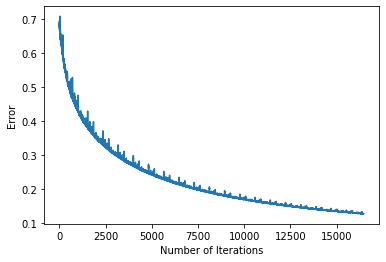

pred_accuracy: 95.99271402550092 %
theta:
 [[ 13.08976878]
 [-13.91104527]
 [ -8.59631094]
 [ -9.81050906]
 [  2.45538467]]

----------- Set 2 -----------
errCompute() =  [0.12449096]
accuracy =  96.35479951397326 %


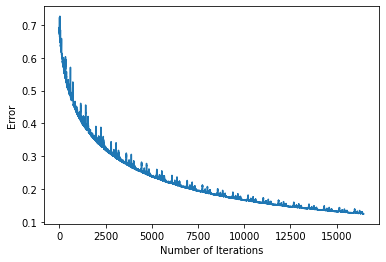

pred_accuracy: 96.35701275045537 %
theta:
 [[ 13.07558067]
 [-14.22292384]
 [ -8.09700356]
 [ -9.64214087]
 [  2.51723818]]

----------- Set 3 -----------
errCompute() =  [0.13230233]
accuracy =  96.47630619684082 %


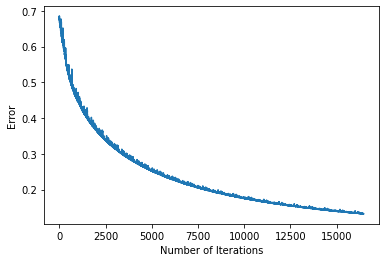

pred_accuracy: 97.81420765027322 %
theta:
 [[ 13.63950563]
 [-13.73650108]
 [ -8.89646769]
 [-10.17886633]
 [  2.04454408]]

----------- Set 4 -----------
errCompute() =  [0.12474121]
accuracy =  96.8408262454435 %


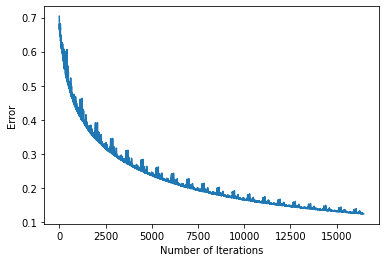

pred_accuracy: 95.99271402550092 %
theta:
 [[ 12.9545138 ]
 [-14.19541988]
 [ -8.20108389]
 [ -9.409047  ]
 [  2.46810057]]

----------- Set 5 -----------
errCompute() =  [0.13135498]
accuracy =  95.9902794653706 %


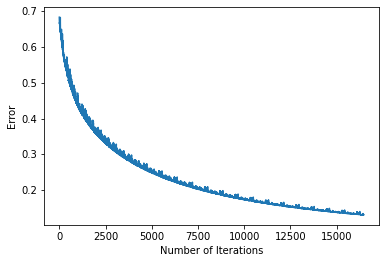

pred_accuracy: 97.99635701275045 %
theta:
 [[ 13.55719083]
 [-13.6887626 ]
 [ -8.67782552]
 [ -9.92316474]
 [  1.87969453]]



,Accuracy
0,95.992714
1,96.357013
2,97.814208
3,95.992714
4,97.996357


In [25]:
# H
## -------------------- calling main block ----------------------
theta_temp = []
yhat_temp = []
accuracy_temp = []
for i in range(5):
    print(f'----------- Set {i+1} -----------')
    # given a train set and optimal learn_rate 0.10 
    theta = stochasticGD(train_set[i], np.zeros((train_set[i].shape[1] - 1, 1)), 0.1, (train_set[0].shape[0])*20)
    
    pred_accuracy, y_hat = pred_yhat_part_h(test_set[i], theta)
    print(f'pred_accuracy: {pred_accuracy} %')   
    print('theta:\n', theta)
    theta_temp.append(theta)
    yhat_temp.append(y_hat)
    accuracy_temp.append(pred_accuracy)   
    print()

#to extract the theta values and arrange nicely in a list 
theta_list = [] 
for i in theta_temp:
    theta_subset = []
    for j in i:
        theta_subset.append(j[0])
    theta_list.append(theta_subset)

# output theta list to csv file
with open('theta_list.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in theta_list)

#to extract the yhat values and arrange nicely in a list 
yhat_list = [] 
for i in yhat_temp:
    yhat_subset = []
    for j in i:
        yhat_subset.append(j[0])
    yhat_list.append(yhat_subset)

# output y_predict list to csv file
with open('y_hat.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in yhat_list)
    
# output accuracy list to csv file
np.savetxt('accuracy.csv', accuracy_temp, fmt='%10.5f', delimiter=',')

#create a table for accuracy list
aaccur_df = pd.DataFrame(accuracy_temp, columns = ['Accuracy'])
accur_df

---
## FINAL THOUGHTS ##

From the cost function graphs above, we can clearly observe that as the iteration number increases, the cost function decreases. Cost function and iteration number have an inverse relatiionship with each other. It reflects the process of the 
stochastic gradient descent algorithm to iteratively reduce the gradient until a minimum point at zero gradient is reached.

The steep curve at the early part of the iteration process points out that the stochastic gradient descent (SGD) algorithm undergoes a bigger change of gradient (a negative gradient directly correlates with the decrement of the cost) until the gradient change is approaching a negligible decremental change to zero in an iterative process. When the cost function ceases to improve further, we can take it as the convergence criterion has reached too. The computed weights (w) at the convex minimum point will be the optimal theta values.

In this practicum, we have also explored another important parameter - learning rate (alpha). In section 4, we have observed that the smaller the learning rate, the more iteration is needed to achieve a convergence criterion. On the other hand, the higher the learning rate, the it takes less iteration to reach the convergence criterion. However, it doesn't mean that the higher the learning rate, the better it is overall. A higher learning rate will lead to a more haphazard descent path due to the bigger step-size. A high learning rate can overshoot the minimum point and fails to work properly for SGD. The best approach is to determine an optimal learning rate that will optimize the SGD algorithm. 

Another takeaway from this practicum is to split up the dataset and after only splitting, we normalize the train and test sets separatively. This is an important step to do because failure to do so will result in data leakage, whereby the 'information' from the test set is 'leaked or seeped' into the train data set. Data leakage, will occur if we normalize the entire dataset before splitting into train and test sets. When that happened, the theta values will contain 'information' of the test set and consequently, the test set will yield unusually higher prediction/accuracy rate than it is supposed to be. Ths is an important takeaway lesson to note for the training of the ML models going forward.



---
## APPENDIX ##
### Program Code ###

In [1]:
import math
import statistics
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
from scipy.special import expit
import matplotlib.pyplot as plt
import csv

In [2]:
# pandas dataframe to preview the data
df_raw = pd.read_csv('data_banknote_authentication.txt', names=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class(label)']) # for checking purpose
df_raw.head() # pandas form

,Variance,Skewness,Kurtosis,Entropy,Class(label)
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# A
def loadData(filename): # load the file into numpy form
    return  pd.read_csv(filename, header = None).to_numpy()

np_raw = loadData('data_banknote_authentication.txt')
print(np_raw, np_raw.shape, type(np_raw))

[[  3.6216    8.6661   -2.8073   -0.44699   0.     ]
 [  4.5459    8.1674   -2.4586   -1.4621    0.     ]
 [  3.866    -2.6383    1.9242    0.10645   0.     ]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771    1.     ]
 [ -3.5637   -8.3827   12.393    -1.2823    1.     ]
 [ -2.5419   -0.65804   2.6842    1.1952    1.     ]] (1372, 5) <class 'numpy.ndarray'>


In [4]:
# B
def dataNorm(X): # normalize the data
    col = np.ones(X.shape[0])
    row = col.reshape(1,X.shape[0])   # reshape ones into [1, 1, ..., 1]  
    for i in X.T:  #loop over X.T to normalize the cols in X
        arr_transpose = (i - np.min(i)) / np.ptp(i)
        row = np.vstack((row, arr_transpose))
    return row.T # transpose row back to original form as X
## ---- calling main ----
X_norm = dataNorm(np_raw)
print(X_norm, X_norm.shape) # check the row and col

[[1.         0.76900389 0.83964273 0.10678269 0.73662766 0.        ]
 [1.         0.83565902 0.82098209 0.12180412 0.64432563 0.        ]
 [1.         0.78662859 0.41664827 0.31060805 0.78695091 0.        ]
 ...
 [1.         0.23738543 0.01176814 0.98560321 0.52475518 1.        ]
 [1.         0.25084193 0.20170105 0.76158701 0.6606745  1.        ]
 [1.         0.32452819 0.49074676 0.34334762 0.88594888 1.        ]] (1372, 6)


In [5]:
# E
def errCompute(X_norm, theta): # compute the error
    # variable initialization
    x = X_norm[:,:-1]
    y = X_norm[:,-1]
    M = X_norm.shape[0]
    y_hat = expit(np.dot(x, theta))
    
    result = (np.dot(y,np.log(y_hat)) + np.dot((1 - y),np.log(1 - y_hat))) / (-M)  # error function
    return result
errCompute(X_norm, np.zeros((X_norm.shape[1]-1,1)))

array([0.69314718])

After running the errCompute function above, we got an error J of 0.6931

In [6]:
# F
def stochasticGD(X_norm, theta, alpha, num_iters):   
    # variable initialization
    x = X_norm[:,:-1]
    y = np.reshape(X_norm[:,-1],(x.shape[0],1))
    # creating an array to record the error after each iteration
    errRecords = np.zeros((num_iters,1))
    
    # stochasticGD algorithm
    for idx in range(num_iters):
        #print "theta",theta.shape
        i = idx % x.shape[0]
        y_hat = expit(np.dot(x,theta))
        for j in range(x.shape[1]):            
            theta[j] += alpha * (y[i] - y_hat[i]) * x[i][j]
        errRecords[idx] = errCompute(X_norm, theta)
        
    # errCompute() should return 0.3151
    print("errCompute() = ", errCompute(X_norm, theta))
    # accuracy verification
    y_hat = np.around(expit(np.dot(x,theta)))
    accuracy = (y == y_hat).mean() * 100
    print("accuracy = ", accuracy, "%")
    
    # plot of error function against iteration number
    x_axis = [x for x in range(0,num_iters)]
    plt.plot(x_axis,list(errRecords))
    plt.ylabel('Error')
    plt.xlabel('Number of Iterations')
    plt.show()
    
    return theta

[[ 0.3292  -4.4552   4.5718  -0.9888   0.     ]
 [-4.8554  -5.9037  10.9818  -0.82199  1.     ]
 [ 5.7456  10.1808  -4.7857  -4.3366   0.     ]
 ...
 [ 0.11739  6.2761  -1.5495  -2.4746   0.     ]
 [ 0.518    0.25865 -0.84085  0.96118  1.     ]
 [ 0.3223  -0.89808  8.0883   0.69222  0.     ]] (1372, 5)
[[1.         0.53157519 0.34866247 0.42466237 0.6873619  0.        ]
 [1.         0.15769206 0.29446168 0.7007948  0.70252962 1.        ]
 [1.         0.92217439 0.89632063 0.02155642 0.3829528  0.        ]
 ...
 [1.         0.51630069 0.75021235 0.16096668 0.55226093 0.        ]
 [1.         0.54519035 0.52504799 0.19149417 0.86466989 1.        ]
 [1.         0.5310776  0.48176481 0.5761475  0.84021386 0.        ]] (1372, 6)
errCompute() =  [0.31513244]
accuracy =  90.59766763848397 %


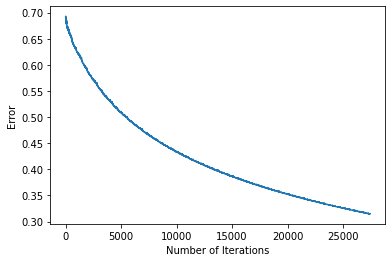

The learned theta is:
 [[ 4.40351322]
 [-7.15911589]
 [-2.66363364]
 [-1.3358347 ]
 [ 1.39339848]]


In [7]:
# F ----------------- calling main block -------------------
shuffled_raw = loadData('shuffled.data')
print(shuffled_raw, shuffled_raw.shape)
X_shufnorm = dataNorm(shuffled_raw)
print(X_shufnorm, X_shufnorm.shape)
theta = stochasticGD(X_shufnorm, np.zeros((X_shufnorm.shape[1]-1,1)), 0.01, 1372*20)
print('The learned theta is:\n', theta)

In [8]:
# F 
def Predict(X_norm, theta):
    # variable initialization
    x = X_norm[:,:-1]
    print("x",x.shape)
    
    # accuracy verification
    pred_from_data = loadData('predict.data')
    y_hat = np.around(expit(np.dot(x,theta)))
    accuracy_rate = (pred_from_data == y_hat).mean() * 100
    print("accuracy = ", accuracy_rate, "%") 
    return y_hat

## main block to compute accuracy and y_hat on predict.data   
y_hat = Predict(X_shufnorm, theta)
print("The predicted y:\n", y_hat, "%") 

x (1372, 5)
accuracy =  100.0 %
The predicted y:
 [[1.]
 [1.]
 [0.]
 ...
 [0.]
 [1.]
 [0.]] %


In [9]:
# F
def optimal_alpha(X_norm, theta, alpha, num_iters, cost=0.05):
    # variable initialization
    x = X_norm[:,:-1]
    y = np.reshape(X_norm[:,-1],(x.shape[0],1))
    # creating an array to record the error after each iteration
    err_records = np.zeros((num_iters,1))
    alpha_records = np.zeros((num_iters, 1))
    # stochasticGD algorithm
    for idx in range(num_iters):
        #print "theta",theta.shape
        i = idx % x.shape[0]
        y_hat = expit(np.dot(x,theta))
        for j in range(x.shape[1]):
            prev = theta
            theta[j] += alpha * (y[i] - y_hat[i]) * x[i][j]
            new = theta                    
        err_records[idx] = errCompute(X_norm, theta)
        alpha_records[idx] = alpha      
        if err_records[0] < cost:   
            break
    return err_records[0][0], alpha_records[idx][0]

optimal_theta = np.array([4.40351322, -7.15911589, -2.66363364, -1.3358347, 1.39339848])        
## ---------------------------- calling main block -------------------------------
# given cost = 0.05, iteration = 1372*20, compute the optimal learn rate
error_list = []
for i in np.arange(0.01, 1.0, 0.01): # loop over the learning rate from 0.1 to 1.0
    cost = 0.05                      # abitrary cutoff cost function value 
    err, optimal = optimal_alpha(X_shufnorm, optimal_theta, i, 1372*20, cost)
    error_list.append(err)
    print('At learn rate =', round(i, 2))
    print(f'Cost: {round(err, 3)}, Learn rate: {round(optimal, 5)}')
    print()
    if err < cost:
        print(f'At cutoff_cost of {cost}, the optimal learn rate is {round(optimal, 3)}')
        break

At learn rate = 0.01
Cost: 0.315, Learn rate: 0.01

At learn rate = 0.02
Cost: 0.234, Learn rate: 0.02

At learn rate = 0.03
Cost: 0.162, Learn rate: 0.03

At learn rate = 0.04
Cost: 0.118, Learn rate: 0.04

At learn rate = 0.05
Cost: 0.092, Learn rate: 0.05

At learn rate = 0.06
Cost: 0.076, Learn rate: 0.06

At learn rate = 0.07
Cost: 0.066, Learn rate: 0.07

At learn rate = 0.08
Cost: 0.058, Learn rate: 0.08

At learn rate = 0.09
Cost: 0.053, Learn rate: 0.09

At learn rate = 0.1
Cost: 0.049, Learn rate: 0.1

At cutoff_cost of 0.05, the optimal learn rate is 0.1


In [10]:
# G
def splitTT(raw, PercentTrain):    
    np.random.shuffle(raw) # shuffles the rows in the X_norm matrix
    row_num = raw.shape[0] # get the num of rows
    ratio = int(row_num*PercentTrain) # ratio expresses in int num
    test = raw[ratio:,:]
    train =  raw[:ratio,:]
#     X_split = [X_train, X_test] # return a list of X train and X test sets
    return train, test
## ---------------- calling main block to split TT------------------
train_set = []
test_set = []
for i in range(5):   
    train, test = splitTT(np_raw, 0.6)
    print(f'train shape: {train.shape}')
    print(f'test shape: {test.shape}')
    print()

    train_norm = dataNorm(train)  # normalize the train
    test_norm = dataNorm(test)
    
    train_set.append(train_norm)
    test_set.append(test_norm)
    
print(f'shape of train_set and test_set: {train_norm.shape}, {test_norm.shape}')
print(f'len of train_set and test_set: {len(train_set)}, {len(test_set)}\n')

print(train_set[0])
print(test_set[0])
y = test_set[0][:, -1]
y.shape

for i in range(5): # output all train and test sets to csv files
    with open(f'train_set_{i+1}.csv', 'w') as f: 
        write = csv.writer(f) 
        write.writerows(val for val in train_set[i])
    with open(f'test_set_{i+1}.csv', 'w') as f: 
        write = csv.writer(f) 
        write.writerows(val for val in test_set[i])

train shape: (823, 5)
test shape: (549, 5)

train shape: (823, 5)
test shape: (549, 5)

train shape: (823, 5)
test shape: (549, 5)

train shape: (823, 5)
test shape: (549, 5)

train shape: (823, 5)
test shape: (549, 5)

shape of train_set and test_set: (823, 6), (549, 6)
len of train_set and test_set: 5, 5

[[1.         0.52092581 0.7768261  0.27384496 0.71097127 0.        ]
 [1.         0.42003175 0.88155452 0.33286234 0.30617047 0.        ]
 [1.         0.59577815 0.66175212 0.04853641 0.61716788 1.        ]
 ...
 [1.         0.39299837 0.5621226  0.60807289 0.88675343 0.        ]
 [1.         0.55739633 0.75025191 0.30019601 0.75503749 0.        ]
 [1.         0.34268746 0.46719424 0.27627889 0.81310839 1.        ]]
[[1.         0.46330621 0.50615073 0.21628651 0.8092245  1.        ]
 [1.         0.84722823 0.82370826 0.11817366 0.61401309 0.        ]
 [1.         0.53240701 0.5142994  0.21763635 0.77438771 1.        ]
 ...
 [1.         0.21953366 0.73047156 0.25415257 0.27628434 1.

In [13]:
# H 
def pred_yhat_part_h(xy_test, theta):

    # variable initialization
    x = xy_test[:,:-1]
#     print("x",x.shape)
    y = xy_test[:, -1]
    y = np.reshape(xy_test[:,-1],(xy_test.shape[0],1))
#     print('y shape:', y.shape)
    
    # accuracy verification
    y_hat = np.around(expit(np.dot(x,theta)))
#     print('y_hat shape:', y_hat.shape)   
    
    accuracy = (y == y_hat).mean() * 100
#     print("accuracy = ", accuracy, "%") 
    return accuracy, y_hat

--------- Set 1 ---------
errCompute() =  [0.12830329]
accuracy =  96.71931956257595 %


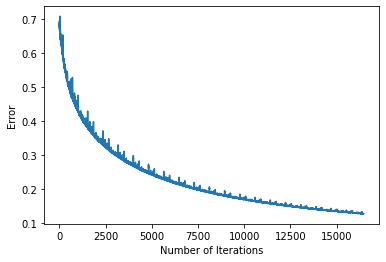

pred_accuracy: 95.99271402550092 %
theta:
 [[ 13.08976878]
 [-13.91104527]
 [ -8.59631094]
 [ -9.81050906]
 [  2.45538467]]

--------- Set 2 ---------
errCompute() =  [0.12449096]
accuracy =  96.35479951397326 %


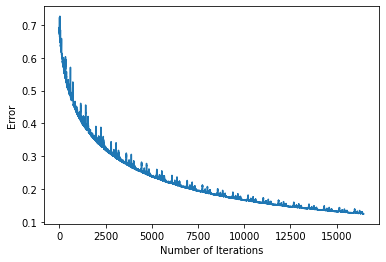

pred_accuracy: 96.35701275045537 %
theta:
 [[ 13.07558067]
 [-14.22292384]
 [ -8.09700356]
 [ -9.64214087]
 [  2.51723818]]

--------- Set 3 ---------
errCompute() =  [0.13230233]
accuracy =  96.47630619684082 %


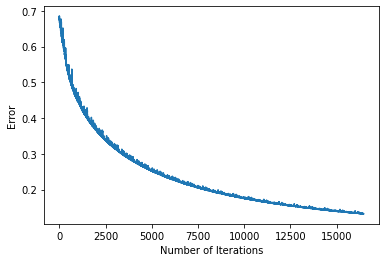

pred_accuracy: 97.81420765027322 %
theta:
 [[ 13.63950563]
 [-13.73650108]
 [ -8.89646769]
 [-10.17886633]
 [  2.04454408]]

--------- Set 4 ---------
errCompute() =  [0.12474121]
accuracy =  96.8408262454435 %


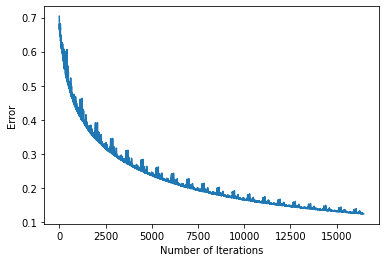

pred_accuracy: 95.99271402550092 %
theta:
 [[ 12.9545138 ]
 [-14.19541988]
 [ -8.20108389]
 [ -9.409047  ]
 [  2.46810057]]

--------- Set 5 ---------
errCompute() =  [0.13135498]
accuracy =  95.9902794653706 %


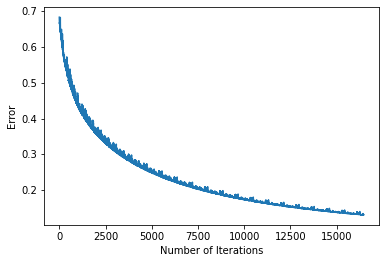

pred_accuracy: 97.99635701275045 %
theta:
 [[ 13.55719083]
 [-13.6887626 ]
 [ -8.67782552]
 [ -9.92316474]
 [  1.87969453]]



,Accuracy
0,95.992714
1,96.357013
2,97.814208
3,95.992714
4,97.996357


In [15]:
# H
## -------------------- calling main block ----------------------
theta_temp = []
yhat_temp = []
accuracy_temp = []
for i in range(5):
    print(f'--------- Set {i+1} ---------')
    # given a train set and optimal learn_rate 0.10 
    # call the SGD function to output theta
    theta = stochasticGD(train_set[i], np.zeros((train_set[i].shape[1] - 1, 1)), 0.1, (train_set[0].shape[0])*20)
    
    # call the tweaked Predict function to o/p accuracy and y_hat
    pred_accuracy, y_hat = pred_yhat_part_h(test_set[i], theta)
    print(f'pred_accuracy: {pred_accuracy} %')   
    print('theta:\n', theta)
    theta_temp.append(theta)
    yhat_temp.append(y_hat)
    accuracy_temp.append(pred_accuracy)   
    print()

# append theta to list
theta_list = [] 
for i in theta_temp:
    theta_subset = []
    for j in i:
        theta_subset.append(j[0])
    theta_list.append(theta_subset)

# output theta list to csv file
with open('theta_list.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in theta_list)
    
# append the y_hat to list
yhat_list = [] 
for i in yhat_temp:
    yhat_subset = []
    for j in i:
#         print(j[0])
        yhat_subset.append(j[0])
    yhat_list.append(yhat_subset)

# output y_predict list to csv file
with open('y_hat.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in yhat_list)
    
# output accuracy list to csv file
np.savetxt('accuracy.csv', accuracy_temp, fmt='%10.5f', delimiter=',')

#create a table for accuracy list
accur_df = pd.DataFrame(accuracy_temp, columns = ['Accuracy'])
accur_df # output the table form of accuracies

In [16]:
## calling block to output theta list into csv file
theta_list = [] 
for i in theta_temp:
    theta_subset = []
    for j in i:
#         print(j[0])
        theta_subset.append(j[0])
    theta_list.append(theta_subset)

with open('theta_list.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in theta_list)

In [17]:
## calling block to output yhat list into csv file

yhat_list = [] 
for i in yhat_temp:
    yhat_subset = []
    for j in i:
#         print(j[0])
        yhat_subset.append(j[0])
    yhat_list.append(yhat_subset)

with open('y_hat.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    write.writerows(val for val in yhat_list)

In [18]:
## TEST UNIT to make sure the csv files load okay
yo = pd.read_csv('test_set_1.csv', header=None)
yo

,0,1,2,3,4,5
0,1.0,0.463306,0.506151,0.216287,0.809224,1.0
1,1.0,0.847228,0.823708,0.118174,0.614013,0.0
2,1.0,0.532407,0.514299,0.217636,0.774388,1.0
3,1.0,0.547989,0.497846,0.238219,0.803777,1.0
4,1.0,0.707789,0.769256,0.183517,0.767420,0.0
...,...,...,...,...,...,...
544,1.0,0.680432,0.869622,0.091142,0.465291,0.0
545,1.0,0.438430,0.255424,0.448358,0.792249,1.0
546,1.0,0.219534,0.730472,0.254153,0.276284,1.0
547,1.0,0.690359,0.794640,0.211862,0.500637,0.0


In [19]:
#TEST UNIT to make sure the csv files load okay
hat = pd.read_csv('y_hat.csv', header=None)
hat

,0,1,2,3,4,5,6,7,8,9,...,539,540,541,542,543,544,545,546,547,548
0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
